In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
train = pd.read_csv('train.csv')

In [119]:
test = pd.read_csv('test.csv')

In [120]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

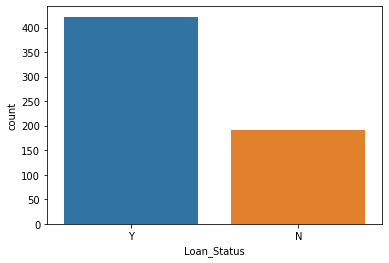

In [121]:
sns.countplot(x = 'Loan_Status',data = train)

In [122]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x: 1 if(x=='Y') else 0)

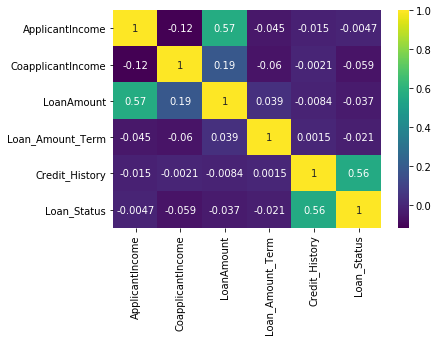

In [123]:
sns.heatmap(train.corr(),annot = True,cmap = 'viridis')

In [124]:
train['Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

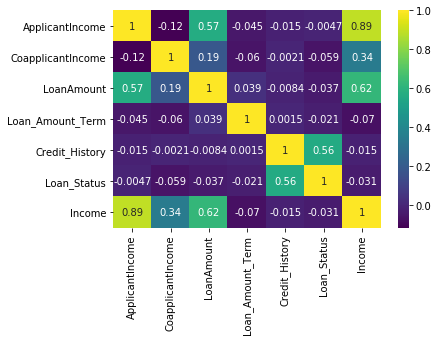

In [125]:
sns.heatmap(train.corr(),annot = True,cmap = 'viridis')

In [126]:
train = train.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1)

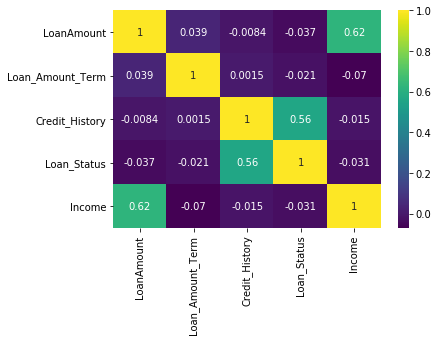

In [127]:
sns.heatmap(train.corr(),annot = True,cmap = 'viridis')

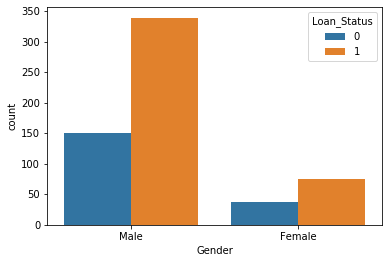

In [128]:
sns.countplot(x = 'Gender',data = train,hue = 'Loan_Status')

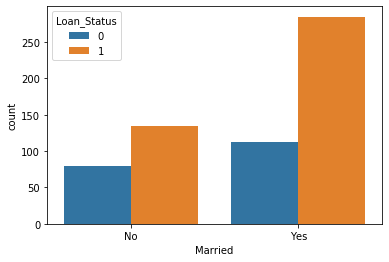

In [129]:
sns.countplot(x = 'Married',data = train,hue = 'Loan_Status')

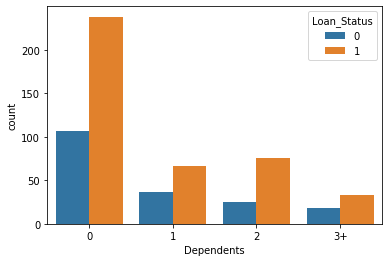

In [130]:
sns.countplot(x = 'Dependents',data = train,hue = 'Loan_Status')

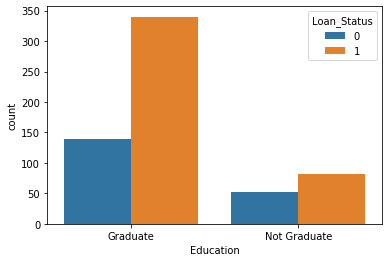

In [131]:
sns.countplot(x = 'Education',data = train,hue = 'Loan_Status')


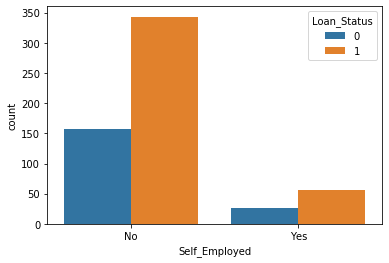

In [132]:
sns.countplot(x = 'Self_Employed',data = train,hue = 'Loan_Status')

In [133]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Income'],
      dtype='object')

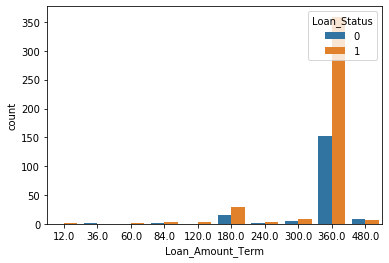

In [134]:
sns.countplot(x = 'Loan_Amount_Term',data = train,hue = 'Loan_Status')

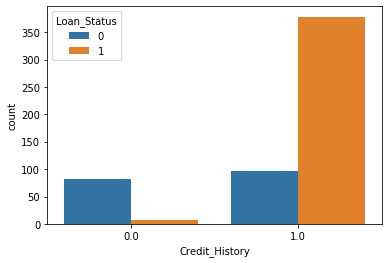

In [135]:
sns.countplot(x = 'Credit_History',data = train,hue = 'Loan_Status')

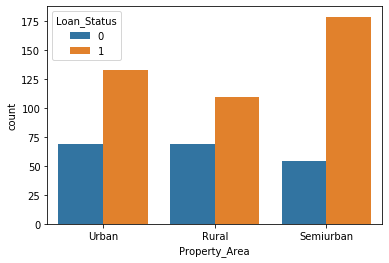

In [136]:
sns.countplot(x = 'Property_Area', data = train, hue = 'Loan_Status')

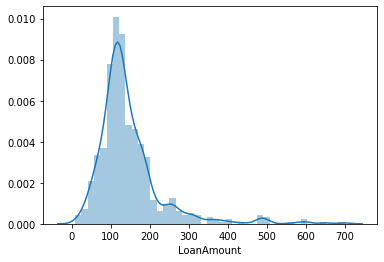

In [137]:
sns.distplot(train['LoanAmount'])

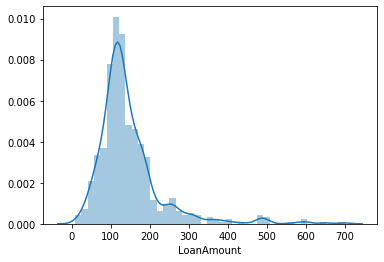

In [138]:
sns.distplot(train['LoanAmount'])

In [139]:
train['LoanAmount'] = np.log(train['LoanAmount'])

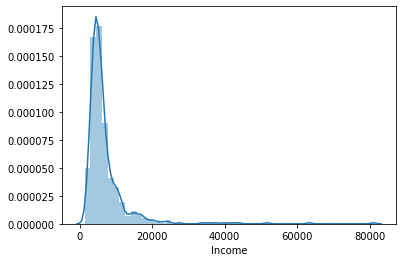

In [140]:
sns.distplot(train['Income'])

In [141]:
train['Income'] = np.log(train['Income'])

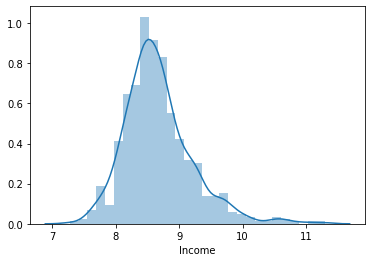

In [142]:
sns.distplot(train['Income'])

# Missing values

In [143]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Income'],
      dtype='object')

In [144]:
train.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [145]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)

In [146]:
train['Married'].fillna(train['Married'].mode()[0],inplace = True)

In [147]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)

In [148]:
train['Dependents'] = train['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [149]:
train['Dependents'] =  train['Dependents'].apply(lambda x: int(x))

In [150]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)

In [151]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace = True)

In [152]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

In [153]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [154]:
train.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [155]:
dummies = pd.get_dummies(train[['Gender',
                                      'Married',
                                      'Education',
                                      'Self_Employed',
                                      'Property_Area']],drop_first = True)

In [156]:
train = pd.concat([train,dummies],axis = 1)

In [157]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,4.857444,360.0,1.0,Urban,1,8.674026,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4.852030,360.0,1.0,Rural,0,8.714568,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,4.189655,360.0,1.0,Urban,1,8.006368,1,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,4.787492,360.0,1.0,Urban,1,8.505323,1,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,4.948760,360.0,1.0,Urban,1,8.699515,1,0,0,0,0,1


In [158]:
train = train.drop(['Gender',
                      'Married',
                      'Education',
                      'Self_Employed',
                      'Property_Area'],axis = 1)

In [159]:
train.head()

,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,4.857444,360.0,1.0,1,8.674026,1,0,0,0,0,1
1,LP001003,1,4.852030,360.0,1.0,0,8.714568,1,1,0,0,0,0
2,LP001005,0,4.189655,360.0,1.0,1,8.006368,1,1,0,1,0,1
3,LP001006,0,4.787492,360.0,1.0,1,8.505323,1,1,1,0,0,1
4,LP001008,0,4.948760,360.0,1.0,1,8.699515,1,0,0,0,0,1


# test data preprocessing

In [160]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [161]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [162]:
test['Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [163]:
test = test.drop(['ApplicantIncome','CoapplicantIncome'],axis = 1)

In [164]:
test['LoanAmount'] = np.log(test['LoanAmount'])

In [165]:
test['Income'] = np.log(test['Income'])

In [166]:
test.isnull().sum()

Loan_ID              0
Gender              11
Married              0
Dependents          10
Education            0
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
Income               0
dtype: int64

In [167]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)

In [168]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)

In [169]:
test['Dependents'] = test['Dependents'].apply(lambda x: 3 if(x == '3+') else x)

In [170]:
test['Dependents'] = test['Dependents'].apply(lambda x: int(x))

In [171]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)

In [172]:
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace = True)

In [173]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)

In [174]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

In [175]:
test.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Income              0
dtype: int64

In [176]:
dummies_test = pd.get_dummies(test[['Gender',
                                      'Married',
                                      'Education',
                                      'Self_Employed',
                                      'Property_Area']],drop_first = True)

In [177]:
test = pd.concat([test,dummies_test],axis = 1)

In [178]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,Male,Yes,0,Graduate,No,4.700480,360.0,1.0,Urban,8.651724,1,1,0,0,0,1
1,LP001022,Male,Yes,1,Graduate,No,4.836282,360.0,1.0,Urban,8.428581,1,1,0,0,0,1
2,LP001031,Male,Yes,2,Graduate,No,5.337538,360.0,1.0,Urban,8.824678,1,1,0,0,0,1
3,LP001035,Male,Yes,2,Graduate,No,4.605170,360.0,1.0,Urban,8.494129,1,1,0,0,0,1
4,LP001051,Male,No,0,Not Graduate,No,4.356709,360.0,1.0,Urban,8.094378,1,0,1,0,0,1


In [179]:
test = test.drop(['Gender',
                      'Married',
                      'Education',
                      'Self_Employed',
                      'Property_Area'],axis = 1)

In [180]:
test.head()

,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,4.700480,360.0,1.0,8.651724,1,1,0,0,0,1
1,LP001022,1,4.836282,360.0,1.0,8.428581,1,1,0,0,0,1
2,LP001031,2,5.337538,360.0,1.0,8.824678,1,1,0,0,0,1
3,LP001035,2,4.605170,360.0,1.0,8.494129,1,1,0,0,0,1
4,LP001051,0,4.356709,360.0,1.0,8.094378,1,0,1,0,0,1


# Train Data - Train - Test - Split

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = train.drop(['Loan_ID','Loan_Status'],axis = 1)

In [183]:
y = train['Loan_Status']

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

# KNN


In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier(n_neighbors=1)

In [187]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [188]:
train_pred = knn.predict(X_test)

In [189]:
from sklearn.metrics import classification_report,confusion_matrix

In [190]:
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.59      0.36      0.45        64
           1       0.72      0.87      0.79       121

    accuracy                           0.69       185
   macro avg       0.65      0.61      0.62       185
weighted avg       0.67      0.69      0.67       185



In [191]:
print(confusion_matrix(y_test,train_pred))

[[ 23  41]
 [ 16 105]]


In [224]:
error_rate = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

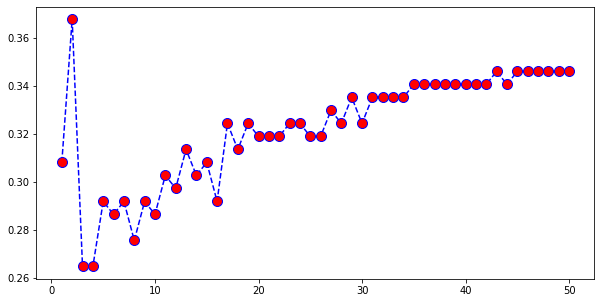

In [225]:
plt.figure(figsize = (10,5))
plt.plot(range(1,51),error_rate,ls = '--',color = 'blue',marker = 'o',markerfacecolor = 'red',markersize = 10)

In [195]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
train_pred = knn.predict(X_test)

In [196]:
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.74      0.36      0.48        64
           1       0.73      0.93      0.82       121

    accuracy                           0.74       185
   macro avg       0.74      0.65      0.65       185
weighted avg       0.74      0.74      0.71       185



In [197]:
print(confusion_matrix(y_test,train_pred))

[[ 23  41]
 [  8 113]]


In [205]:
actual_test = test.drop('Loan_ID',axis = 1)

In [206]:
predictions = knn.predict(actual_test)

In [207]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [208]:
df = pd.DataFrame(predictions,columns = ['Loan_Status'])

In [209]:
df.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [210]:
test = pd.concat([test,df],axis = 1)

In [211]:
test.head()

,Loan_ID,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001015,0,4.700480,360.0,1.0,8.651724,1,1,0,0,0,1,1
1,LP001022,1,4.836282,360.0,1.0,8.428581,1,1,0,0,0,1,1
2,LP001031,2,5.337538,360.0,1.0,8.824678,1,1,0,0,0,1,1
3,LP001035,2,4.605170,360.0,1.0,8.494129,1,1,0,0,0,1,1
4,LP001051,0,4.356709,360.0,1.0,8.094378,1,0,1,0,0,1,1


In [214]:
result = test[['Loan_ID','Loan_Status']]

In [215]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [217]:
result.iloc[69]

Loan_ID        LP001361
Loan_Status           0
Name: 69, dtype: object

In [218]:
result['Loan_Status'] = result['Loan_Status'].apply(lambda x: 'Y' if(x==1) else 'N')

C:\Users\sivar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [220]:
result['Loan_Status'].value_counts()

Y    357
N     10
Name: Loan_Status, dtype: int64

In [223]:
result.to_csv('knn.csv',index = False)